# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
#1 - Criando a matriz utilizando patsy e StatsmodelsFormula.
reg = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.64e-20
Time:                        12:58:53   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#2 - Removendo Variaveis insignificantes.
reg = smf.ols('tip ~ smoker +  net_bill', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           4.56e-22
Time:                        13:03:25   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

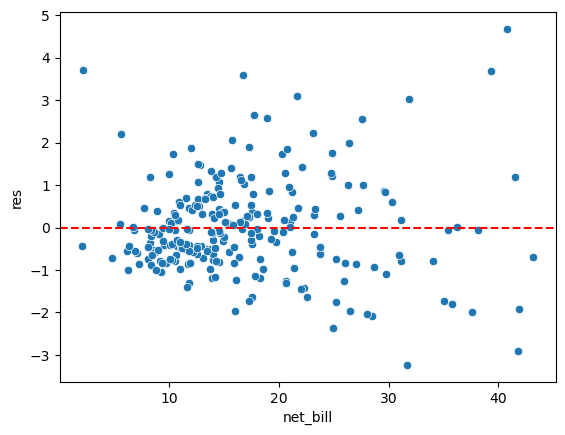

In [9]:
#3 - gráfico de resíduos em função de net_bill
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [10]:
#net_bill em log
reg = smf.ols('tip ~ smoker +  np.log(net_bill)', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           5.38e-19
Time:                        13:07:05   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

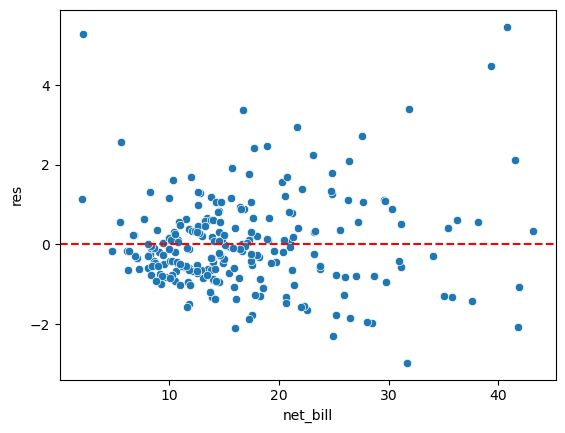

In [15]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [16]:
# net_bill em polinomio
reg = smf.ols('tip ~ smoker +  np.power(net_bill, 2)', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.04e-19
Time:                        13:10:03   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

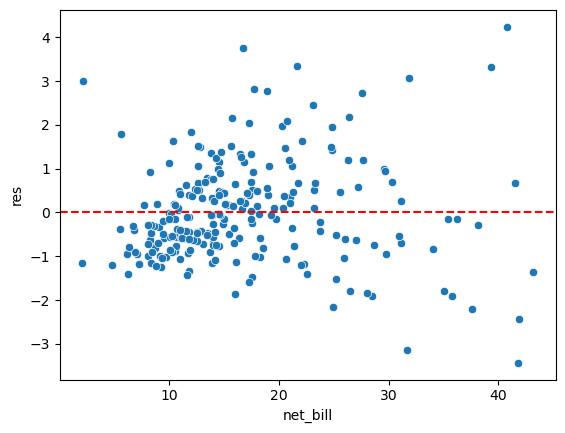

In [18]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

### O Polinomio de net_bill parece ser melhor apesar do R^2 ter diminuido o Pvalue da variavel smoker se aproximou mais de zero.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [29]:
reg =  smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data=tips).fit()

tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.21e-18
Time:                        13:23:01   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
reg =  smf.ols('np.log(tip) ~ smoker + net_bill', data=tips).fit()

tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.31e-20
Time:                        13:23:52   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

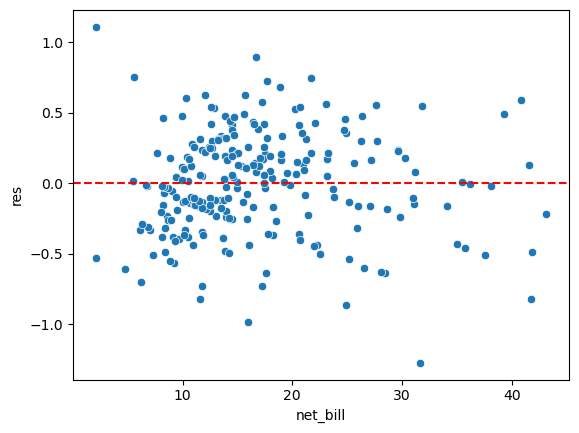

In [31]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(color='r', linestyle='--')

In [32]:
reg =  smf.ols('np.log(tip) ~ smoker + np.log(net_bill)', data=tips).fit()

tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           7.20e-21
Time:                        13:26:28   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
reg =  smf.ols('np.log(tip) ~ smoker + np.power(net_bill, 2)', data=tips).fit()

tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           5.45e-16
Time:                        13:27:07   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### O R^2 com log de net_bill aumentou.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [37]:
#Carregando dados e tirando algumas variaveis que não são necessarias
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop(labels=['Unnamed: 0', 'index'], axis=1)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [45]:
#Modelo renda ~ tempo_emprego
reg = smf.ols('renda ~ tempo_emprego', data=df).fit()
df['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:37:38   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

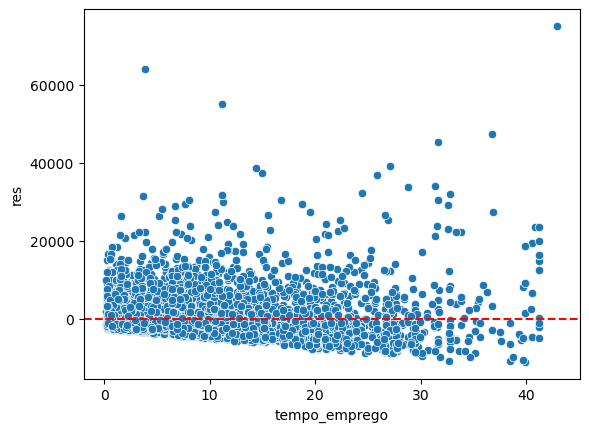

In [48]:
#Grafico com residuos
sns.scatterplot(x='tempo_emprego', y='res', data=df)
plt.axhline(color='r', linestyle='--')

In [52]:
#Ajustando variaveis para melhorar o modelo
reg = smf.ols('renda ~ np.power(tempo_emprego, 2)', data=df).fit()
df['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:41:35   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3789.9264     45.197     83.854      0.000    3701.334    3878.519
np.power(tempo_emprego, 2)     9.9976      0.201     49.780      0.000       9.604      10.391
==============================================================================
Omnibus:                     9652.373   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333382.424
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      27.391   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

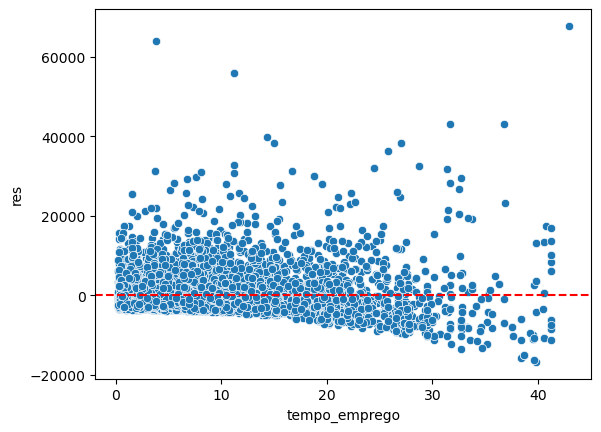

In [53]:
#Grafico com residuos
sns.scatterplot(x='tempo_emprego', y='res', data=df)
plt.axhline(color='r', linestyle='--')

In [55]:
#Colunas do DataFrame
df.columns

Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda', 'res'],
      dtype='object')

In [56]:
#Modelo com todas as variaveis
reg_mult = smf.ols('renda ~ data_ref + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau', data=df).fit()
df['res_mult'] = reg_mult.resid
reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     90.76
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:52:43   Log-Likelihood:            -1.2198e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12426   BIC:                         2.443e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -184.8312   1682.790     -0.110      0.913   -3483.360    3113.698
data_ref[T.2015-02-01]              28.8921    211.111      0.137      0.891    -384.918     442.702
data_ref[T.2015-03-01]              34.5094    210.914      0.164      0.870    -378.914     447.933
data_ref[T.2015-04-01]             -50.4359    211.468     -0.239      0.811    -464.947     364.075
data_ref[T.2015-05-01]            -157.2451    209.715     -0.750      0.453    -568.319     253.829
data_ref[T.2015-06-01]               7.9744    211.744      0.038      0.970    -407.076     423.024
data_ref[T.2015-07-01]             -92.2468    211.949     -0.435      0.663    -507.699     323.206
data_ref[T.2015-08-01]            -229.9582    212.166     -1.084      0.278    -645.835     185.919
data_ref[T.2015-09-01]            -258.5927    211.251     -1.224      0.221    -672.677     155.491
data_ref[T.2015-10-01]              20.7689    210.707      0.099      0.921    -392.249     433.787
data_ref[T.2015-11-01]            -166.0106    210.843     -0.787      0.431    -579.296     247.275
data_ref[T.2015-12-01]            -374.6998    211.096     -1.775      0.076    -788.481      39.082
data_ref[T.2016-01-01]            -256.6139    210.778     -1.217      0.223    -669.771     156.544
data_ref[T.2016-02-01]              88.9340    210.967      0.422      0.673    -324.595     502.463
data_ref[T.2016-03-01]             120.9274    211.119      0.573      0.567    -292.898     534.753
sexo[T.M]                         2363.4597     88.166     26.807      0.000    2190.641    2536.278
posse_de_veiculo[T.True]           -80.6067     84.807     -0.950      0.342    -246.841      85.627
posse_de_imovel[T.True]            349.5413     83.488      4.187      0.000     185.893     513.190
tipo_renda[T.Bolsista]            -842.7460   2157.164     -0.391      0.696   -5071.122    3385.630
tipo_renda[T.Empresário]          1022.2036     90.197     11.333      0.000     845.404    1199.003
tipo_renda[T.Pensionista]         1820.5646   1459.996      1.247      0.212   -1041.253    4682.383
tipo_renda[T.Servidor público]     430.0879    130.665      3.292      0.001     173.964     686.212
educacao[T.Pós graduação]         2165.9613   1081.801      2.002      0.045      45.463    4286.460
educacao[T.Secundário]            -251.3129    437.978     -0.574      0.566   -1109.818     607.192
educacao[T.Superior completo]      341.8032    439.888      0.777      0.437    -520.445    1204.051
educacao[T.Superior incompleto]   -305.1668    471.161     -0.648      0.517   -1228.714     618.381
estado_civil[T.Separado]           152.4936    807.503      0.189      0.850   -1430.337    1735.324
estado_civil[T.Solteiro]           380.1467    792.76

In [60]:
#Refazendo modelo com as variaveis que mais explicam
reg_mult = smf.ols('renda ~ sexo + posse_de_imovel + idade + tempo_emprego', data=df).fit()
df['res_mult'] = reg_mult.resid
reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     813.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:58:02   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12461   BIC:                         2.442e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 455.8353    186.029      2.450      0.014      91.190     820.481
sexo[T.M]                2299.6921     82.355     27.924      0.000    2138.263    2461.121
posse_de_imovel[T.True]   434.8417     81.921      5.308      0.000     274.264     595.420
idade                      24.3007      4.427      5.489      0.000      15.623      32.979
tempo_emprego             296.2532      6.097     48.586      0.000     284.301     308.205
==============================================================================
Omnibus:                    10139.758   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439131.435
Skew:                           3.612   Prob(JB):                         0.00
Kurtosis:                      31.165   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#Ajustando as variaveis para melhorar o modelo
reg_mult = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + np.power(idade, 2) + tempo_emprego', data=df).fit()
df['res_mult'] = reg_mult.resid
reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     909.3
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:04:58   Log-Likelihood:                -13333.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.671e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.4543      0.019    396.660      0.000       7.417       7.491
sexo[T.M]                   0.4742      0.013     35.455      0.000       0.448       0.500
posse_de_imovel[T.True]     0.1016      0.013      7.631      0.000       0.075       0.128
np.power(idade, 2)       5.407e-05    8.5e-06      6.360      0.000    3.74e-05    7.07e-05
tempo_emprego               0.0478      0.001     48.269      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.288   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                1.264
Skew:                           0.011   Prob(JB):                        0.532
Kurtosis:                       3.044   Cond. No.                     6.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

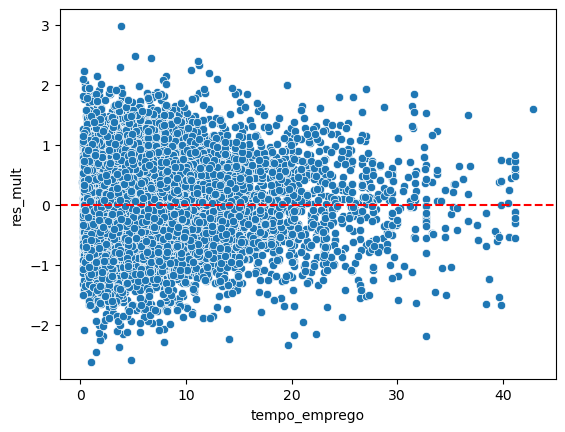

In [81]:
#Grafico de residuos tempo_emprego
sns.scatterplot(x='tempo_emprego', y='res_mult', data=df)
plt.axhline(color='r', linestyle='--')

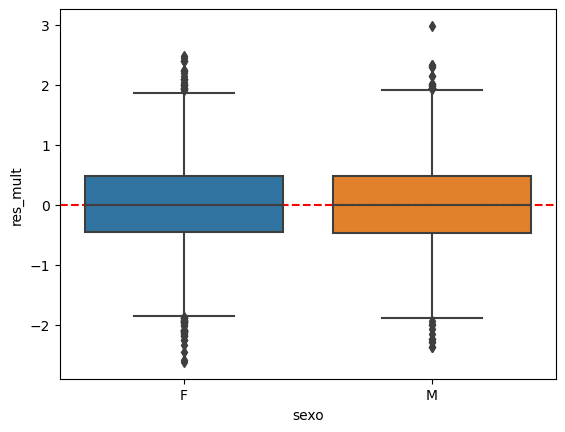

In [83]:
#Grafico residuos sexo
sns.boxplot(x='sexo', y='res_mult', data=df)
plt.axhline(color='r', linestyle='--')

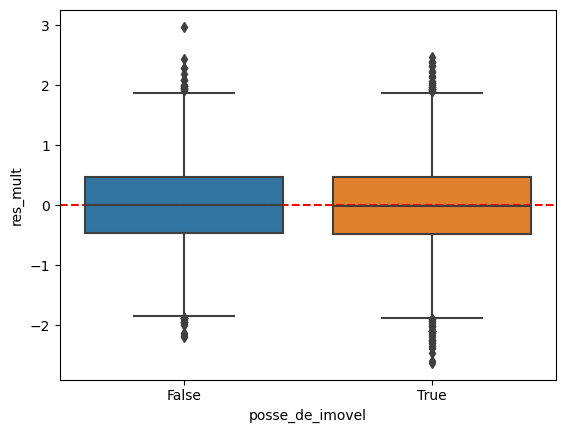

In [84]:
#Grafico residuos posse_de_imovel
sns.boxplot(x='posse_de_imovel', y='res_mult', data=df)
plt.axhline(color='r', linestyle='--')

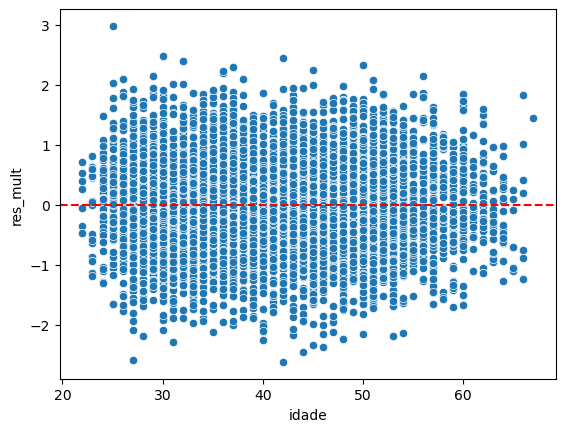

In [86]:
#Grafico de residuos Idade
sns.scatterplot(x='idade', y='res_mult', data=df)
plt.axhline(color='r', linestyle='--')